<h1><center><font size="6">Predicting Financial Distress</font></center></h1>

<h3><center><font size="4">  </font></center></h2>

In [1]:
# All of these are going to be done

# Resampling data comparison

# Data Cleansing using custom Python functions
# Identification of bad columns: those with nulls, blanks, constant values or duplicated features
# Prefix/Suffix removal
# Alphanumeric column splitting
# Blank space conversion to np.nan

# Feature engine open source package from Soledad (Udemy instructor)
# Null imputation using Median (continuous features) & Mode(categorical features)
# Reducing cardinality:Discretization (continuous features) & Rare label binning (categorical features)
# Categorical feature Encoding (Label + Ordinal encoding)

<a id="top"></a> <br>
## Table of Contents
1. [Introduction](#1)

1. [Initialization](#2)
    1. [Load Packages](#21)
    1. [Define Metadata](#22)
    
1. [Load Data & Validate](#3)
    
1. [Data Skewness Correction](#4)
    1. [Prepping before resampling](#41)
        1. [Import cleaned dataframe](#411)
        1. [Feature Target and Train Test Split](#412)
        1. [Initializing Metrics Capture](#413)
        1. [Import Custom Test Functions](#414)
    1. [Resampling Strategies Comparison](#42)
        1. [Resampling Method1: Undersampling - Random Undersampling](#421)
        1. [Resampling Method2: Oversampling - SMOTE](#422)
        1. [Resampling Method3: Hybrid Oversampling and Undersampling using SMOTEENN](#423)
        1. [Resampling Method4: Custom function to oversample at different rates](#424)
    
1. [Data Cleansing & EDA for ML Generalizability](#5)
    1. [Pre-cleaning](#51)
        1. [Identify Bad columns](#511)
        1. [Convert Blanks to np.nan](#512)
        1. [Convert data types - string to float](#513)
        1. [Update Bad columns list](#514)
    1. [EDA for ML Generalizability](#52)
        1. [Selecting top features](#521)
        1. [EDA - Numerical Columns](#522)
        1. [Outlier Definition, Detection & Removal](#523)
    
1. [Data Signal Amplification](#6)
    1. [Data Prep - Feature Target & Train Test Split](#62)
    1. [Handling Null Values](#62)
        1. [Pre-Imputation](#621)
        1. [Imputation](#622)
        1. [Performance Testing](#623)
    1. [Variance Reduction](#63)
        1. [Binning - Numerical Feature](#631)
        1. [Rare Label Encoding - Categorical Features](#633)
    
1. [Conclusion](#7)

1. [References](#8)

## <a id='1'>Introduction</a>  

Continuing on from the previous week, the aim here is to improve upon our baseline model performance by focussing on the data

## <a id='2'>Initialization</a>  

### <a id='21'>Load Packages</a>  



Load the minimum number of packages to get started and add more as we go along

In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# This is to suppress any deprecation warnings 

import os

import sys
sys.path.append("/home/paperspace/Kaggle Grandmaster/Udemy Superstar/Classification") 
# Adds higher directory to python modules path.

### <a id='22'>Define Metadata</a>  

In [3]:
# Define the name of the target class column here instead of manually typing it out everywhere
target_class_name = 'SeriousDlqin2yrs'

# Fill in the names of what you want to call the 0 and 1 class
labels = ['No Distress', 'Distress']

input_file_name = 'cs-training.csv'

intermediate_data_path = '../intermediate data/'

# This will be used to compare resampling techniques
clean_df_file_name = intermediate_data_path + 'day1_cleaned_df_output_20200511.pkl'

output_df_file_name = 'day2_cleaned_df_output_' 

# Enter the date in which this notebook is run
export_date = '20200515'


In [4]:
# Check ou tthe names of the files in the input folder that we need to load as dataframe
import os
print(os.listdir('../input'))
# This will list all the files in this folder

['Readme.txt', '.ipynb_checkpoints', 'cs-training.csv', 'cs-test.csv', 'Data%20Dictionary.xls', 'Data Dictionary.txt', 'sampleEntry.csv']


In [5]:
# Check ou tthe names of the files in the input folder that we need to load as dataframe
import os
print(os.listdir('../intermediate data'))
# This will list all the files in this folder

['.ipynb_checkpoints', 'day1_cleaned_df_output_20200511.pkl', 'day2_cleaned_df_output_20200515.csv', 'week1_cleaned_df_output_20190921.csv']


## <a id='3'>Load Data & Validate</a>  

In [6]:
df = pd.read_csv('../input/' + input_file_name)

# drop the first column
del df['Unnamed: 0']

# place the SeriousDlqin2yrs as the last column because its the target variable
df = (pd.concat([df[df.columns[1:]],df[df.columns[0]]], axis=1))

df.sample(5)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
28269,0.018594,86,0,0.000383,60000.0,3,0,0,0,0.0,0
78027,0.003712,49,0,0.000545,9166.0,4,0,0,0,0.0,0
82329,0.089428,43,0,0.480152,10000.0,10,0,2,0,2.0,0
83585,0.164830,57,0,0.968822,4361.0,13,0,1,0,0.0,0
107740,0.012926,77,2,5.496834,3000.0,13,0,3,0,0.0,0



Lets check the head & tail to make sure there is nothing going on

In [7]:
df.head(3)
# What you are checking here is whether there are some unwanted headers from teh input file that 
# can corrupt our data
# If found, either open the file and manually delete it or only load the relevant columns

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0


In [8]:
df.tail(3)
# similar logic here

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
149997,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0,0
149998,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,0
149999,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0,0


No trouble with loading the data. Both the head and tail are clean

We are going to hold off on EDA & data correction until after the data augmentation

## <a id = 4> Data Skewness Correction

Data always beats algorithm. 

Given that our dataset is heavily skewed in favor of the negative class (ie non-fraud),
any technique that brings the ratio closer to 50:50 should theoretically improve the performance.

The theoretical reason for favoring the 50:50 ratio is that the results will be no worse than what was obtained with natural class distributions.

https://www.researchgate.net/publication/2364670_The_Effect_of_Class_Distribution_on_Classifier_Learning_An_Empirical_Study

Broadly there are 2 approaches to data skewness correction: undersampling and oversampling
    
In Undersampling, we throw away the negative class until the remaining data is balanced.

In Oversampling, we sample  repeatedly the positive class until the synthetic data is balanced

There is also the hybrid approach where we sample both classes simultaneously until the minority class reaches a threshold and I will also introduce a custom function to generate samples.

But first, lets do some groundwork ....

### <a id = 41> Prepping before resampling

#### <a id = 411> Import cleaned dataframe from Day1

This is just to compare the resampling techniques and doesnt affect the subsequent steps. Hence use the cleaned dataset from last week

In [9]:
import pickle

infile = open(clean_df_file_name,'rb')
clean_df = pickle.load(infile)
infile.close()


#### <a id = 412> Feature Target and Train Test Split


Why should we do the train test split here rather than just before the modelling?

Because the data augmentation techniques should leave the Test set alone and only augment the train set. The Test set should be a valid representation of how the unseen unlabelled production data will occur during which time we wont have the luxury of correcting the imbalance


In [10]:
# Feature Target split
clean_X = clean_df.drop(target_class_name, axis=1)
clean_y = clean_df[target_class_name]

# split into train and test set and make sure to use the stratify = y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clean_X, clean_y, test_size=0.2, 
                                                    stratify=clean_y, random_state=42)

# These are the original dimensions and the class distributions
print(X_train.shape, X_test.shape, sum(y_train), sum(y_test))


(96215, 10) (24054, 10) 6686 1671


#### <a id = 413> Initializing Metrics Capture

Let me initialize a dataframe to hold relevant metrics for each of the augmentation techniques we are going to try

In [11]:
sampling_strategy_metrics_df = pd.DataFrame(
columns = ['Pos_Precision','Pos_Recall','Pos_F1',
           'ROC AUC','FN','TP','FP','TN','Precision_at_Recall'],
index = ['Undersampling','Oversampling','Hybrid','Custom'])

sampling_strategy_metrics_df

# Depending on the business problem, one or more of these metrics will be more important.
# Here lets assume that the Recall is what we are interested in 
# as long as the Precision is not too far off
# Unlike balanced datasets, the ROC AUC is a poor indicator here 
# because the algorithm can get 'good' scores by just predicting
# everything as the majority class.

# The prefixes exist for the Precision, Recall and F1 
# because I am only interested in the positive class

,Pos_Precision,Pos_Recall,Pos_F1,ROC AUC,FN,TP,FP,TN,Precision_at_Recall
Undersampling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oversampling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hybrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Custom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### <a id = 414> Importing Test Functions

Given that there are 4 techniques that I want to compare, its better to have a custom function that to avoid repeating code. I am going to create a wrapper around my metrics function to output the resampled train sets and test metrics

In [12]:
from helper_functions_comprehensive import resample_and_test_performance_function

### <a id = 42> Resampling Strategies Comparison

There are many techniques for undersampling, oversampling and the hybrid approach. One popular API is imblearn available at
https://imbalanced-learn.readthedocs.io/en/stable/api.html

In this notebook, I am going to pick one implementation for each approach and compare results. 
The reader is encouraged to try all

#### <a id = 411> Resampling Method1: Undersampling - RandomUnderSampler

In the first implementation, I am going to downsample my majority (negative) class using the RandomUnderSampler method as the name suggests, the algorithm randomly selects the minority class until the class ratio is the same

The reader is encouraged to select more sophisticated techniques available in imblearn API documentation

The size of the resampled train sets are as follows:
(96215, 10) 6686
Has a Test accuracy of 93.0 % 
              precision    recall  f1-score   support

 No Distress       0.94      0.99      0.96     22383
    Distress       0.54      0.18      0.27      1671

    accuracy                           0.93     24054
   macro avg       0.74      0.58      0.62     24054
weighted avg       0.91      0.93      0.92     24054

The ROC AUC Score on Test set is 0.82
Confusion matrix, without normalization
[[22124   259]
 [ 1369   302]]


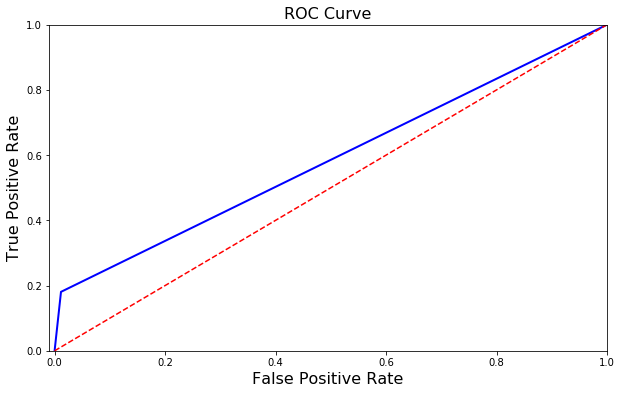

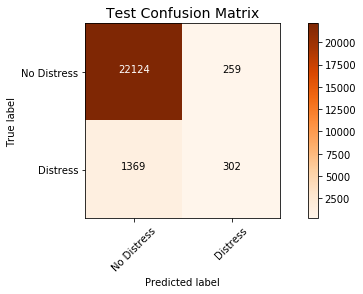

In [13]:
from imblearn.under_sampling import RandomUnderSampler

_,__, sampling_strategy_metrics_df.loc['Undersampling'] = resample_and_test_performance_function(
                    RandomUnderSampler(random_state=42, sampling_strategy='not majority'), 
                    X_train, y_train, X_test, y_test, labels)

# Notice how the size of the downsampled dataset is exactly 
# twice as large as the number of minority positive class

In [14]:
sampling_strategy_metrics_df

,Pos_Precision,Pos_Recall,Pos_F1,ROC AUC,FN,TP,FP,TN,Precision_at_Recall
Undersampling,0.538324,0.18073,0.270609,0.82,1369,302,259,22124,0.126401
Oversampling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hybrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Custom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The Precision at Recall is slightly worse than the baseline

If the modelling efforts were to stop now, business will likely choose the baseline model from day1
because of its simplicity

#### <a id = 422>Resampling Method2: Oversampling - SMOTE

Next, I am going to try a popular oversampling technique for SMOTE
SMOTE stands for Synthetic Minority Over-sampling Technique and was presented in a 2002 paper here
https://jair.org/index.php/jair/article/view/10302/24590

this technique is theoretically superior to just oversampling with replacement for the minority class 
(the latter causes the decision tree to overfit)
In SMOTE, instead of sampling with replacement of the original minority class, synthetic new samples are generated
According to the article, Synthetic samples are generated in the following way: 

"Take the difference between the feature vector (sample)under consideration and its nearest neighbor. 
Multiply this difference by a random numberbetween 0 and 1, and add it to the feature vector under consideration.  
This causes the selection of a random point along the line segment between two specific features.  
This approach effectively forces the decision region of the minority class to become more general."

The size of the resampled train sets are as follows:
(179058, 10) 89529
Has a Test accuracy of 93.0 % 
              precision    recall  f1-score   support

 No Distress       0.95      0.98      0.96     22383
    Distress       0.49      0.24      0.32      1671

    accuracy                           0.93     24054
   macro avg       0.72      0.61      0.64     24054
weighted avg       0.91      0.93      0.92     24054

The ROC AUC Score on Test set is 0.83
Confusion matrix, without normalization
[[21955   428]
 [ 1265   406]]


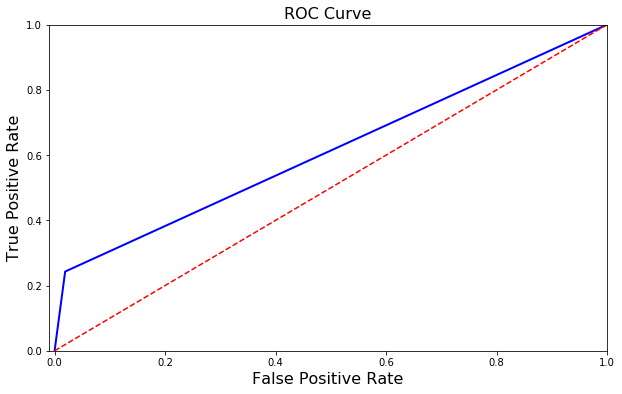

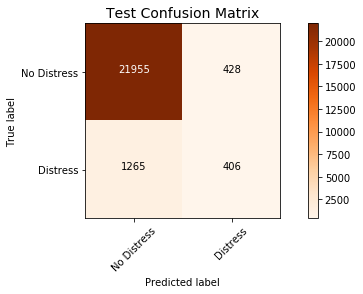

In [15]:
from imblearn.over_sampling import SMOTE

_,__, sampling_strategy_metrics_df.loc['Oversampling'] = resample_and_test_performance_function(
                                SMOTE(random_state=42), X_train, y_train, X_test, y_test, labels)

# Notice how the upsampled dataset is exactly twice as large as the number of minority positive class
# This is characteristic of SMOTE

In [16]:
sampling_strategy_metrics_df

,Pos_Precision,Pos_Recall,Pos_F1,ROC AUC,FN,TP,FP,TN,Precision_at_Recall
Undersampling,0.538324,0.18073,0.270609,0.82,1369,302,259,22124,0.126401
Oversampling,0.486811,0.242968,0.324152,0.83,1265,406,428,21955,0.136772
Hybrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Custom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is also better than the baseline model

Next, we are going to explore how the performance is affected if we go with a combination of upsampling and undersampling

#### <a id = 423>Resampling Method3: Hybrid Oversampling and Undersampling using SMOTEENN

We are going to explore a strategy known as SMOTEENN
which combines the now-familiar SMOTE upsampling technique with ENN undersampling
https://imbalanced-learn.readthedocs.io/en/stable/api.html#module-imblearn.combine


ENN is Edited Nearest Neighbors which first oversamples both the minority and majority class until they are balanced.
Then the Tomek links are removed. This prevents the majority class from 'intruding' too deep into the minority class space
This is explained in the following paper https://pdfs.semanticscholar.org/c1a9/5197e15fa99f55cd0cb2ee14d2f02699a919.pdf

the original description of Tomek links is given in the IEEE paper from 1976
https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=4309452

The size of the resampled train sets are as follows:
(137130, 10) 77059
Has a Test accuracy of 92.0 % 
              precision    recall  f1-score   support

 No Distress       0.95      0.96      0.96     22383
    Distress       0.40      0.38      0.39      1671

    accuracy                           0.92     24054
   macro avg       0.68      0.67      0.67     24054
weighted avg       0.92      0.92      0.92     24054

The ROC AUC Score on Test set is 0.83
Confusion matrix, without normalization
[[21437   946]
 [ 1034   637]]


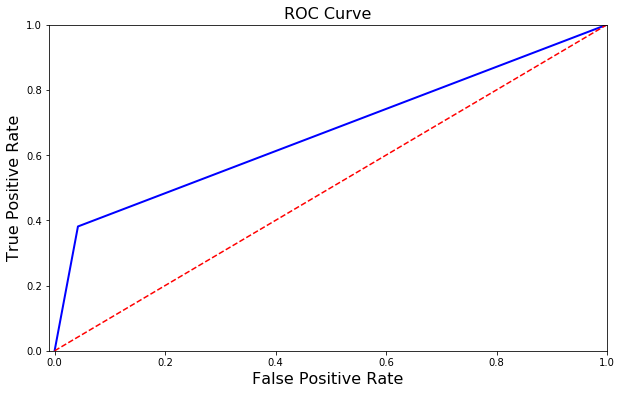

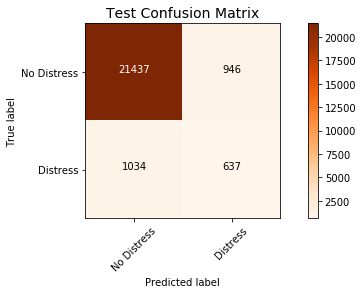

In [17]:
from imblearn.combine import SMOTEENN

# Note that unlike the previous 2 methods, SMOTEENN comes with the param for the sampling_strategy.
# The default is auto' which will select the minority class only but I chose to resample both classes

_,__, sampling_strategy_metrics_df.loc['Hybrid'] = resample_and_test_performance_function(
SMOTEENN(sampling_strategy = 'all' ,random_state=42), X_train, y_train, X_test, y_test, labels)

# Unlike the other resampling strategies, the resampled data size isnt easy to infer from the original data size

In [18]:
sampling_strategy_metrics_df

,Pos_Precision,Pos_Recall,Pos_F1,ROC AUC,FN,TP,FP,TN,Precision_at_Recall
Undersampling,0.538324,0.18073,0.270609,0.82,1369,302,259,22124,0.126401
Oversampling,0.486811,0.242968,0.324152,0.83,1265,406,428,21955,0.136772
Hybrid,0.402401,0.381209,0.391518,0.83,1034,637,946,21437,0.139171
Custom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hybrid performance is similar to the Undersampling technique

#### <a id = 424>Resampling Method4: Custom function to oversample at different rates

In [19]:
# The generalized version of the oversampling is when we simultaneously upsample both the classes at different rates

In [20]:
from helper_functions_comprehensive import augment_data_function
X_resampled_train, y_resampled_train = augment_data_function(X_train, y_train, 
                    positive_upsampling_ratio=4, negative_upsampling_ratio=2)
print(X_resampled_train.shape,sum(y_resampled_train))

(205802, 10) 26744.0


Has a Test accuracy of 92.0 % 
              precision    recall  f1-score   support

 No Distress       0.95      0.97      0.96     22383
    Distress       0.45      0.35      0.39      1671

    accuracy                           0.92     24054
   macro avg       0.70      0.66      0.68     24054
weighted avg       0.92      0.92      0.92     24054

The ROC AUC Score on Test set is 0.83
Confusion matrix, without normalization
[[21664   719]
 [ 1087   584]]


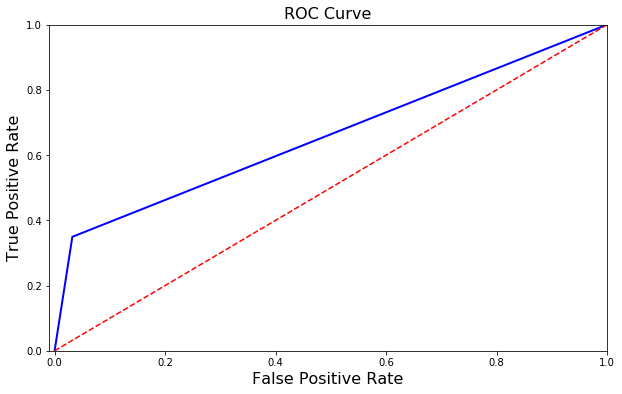

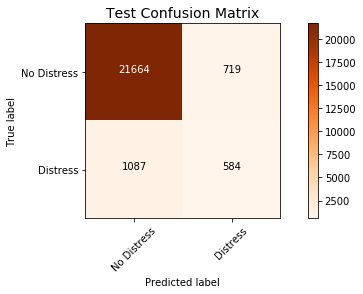

In [21]:
from helper_functions_comprehensive import test_rf_performance_function
sampling_strategy_metrics_df.loc['Custom'] = test_rf_performance_function(
            X_resampled_train, y_resampled_train, X_test, y_test, labels)

In [22]:
sampling_strategy_metrics_df

,Pos_Precision,Pos_Recall,Pos_F1,ROC AUC,FN,TP,FP,TN,Precision_at_Recall
Undersampling,0.538324,0.18073,0.270609,0.82,1369,302,259,22124,0.126401
Oversampling,0.486811,0.242968,0.324152,0.83,1265,406,428,21955,0.136772
Hybrid,0.402401,0.381209,0.391518,0.83,1034,637,946,21437,0.139171
Custom,0.448196,0.349491,0.392737,0.83,1087,584,719,21664,0.135905


From now on choose the Hybrid (SMOTEENN) because it has the best performance amongst the resampling techniques

### Next steps

Now that we know what resampling technique to use and what is the benchmark performance to beat, lets bring back the raw dataset and clean it up

The cleaning techniques will be kept only if they beat the performance above on the test set after resampling the train set

## <a id = 5> Data Cleansing & EDA for ML Generalizability

There is a very significant chunk of data munging about to be done here to increase the data quality

### <a id = 51> Pre-cleaning setup

this dataset is fairly okay and there isnt anything that needs to be applied to the whole dataset. So we will skip this section

### <a id = 52> EDA for ML Generalizability

This is the section where we deep dive into the data and do EDA. However I am only going to focus on the top features in the interests of time. The idea is to identify patterns in the data that will eventually make our model more powerful (either through Feature Engineering done in Day3 or removing data points because they are outliers which are unlikely to occur in Production data

#### <a id = 521> Selecting top features - Feature Importances

Note that I am going to use the clean_df to determine the feature importances along with the winning data augmentation technique

In [23]:
sum(y_train)

6686

In [24]:
X_resampled_train, y_resampled_train = SMOTEENN(sampling_strategy = 'all' ,
                                                random_state=42).fit_resample(X_train, y_train)

In [25]:
# Lets define a simple classifier based on the above augmented data

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 42)

# Fit on the resampled train data
classifier.fit(X_resampled_train, y_resampled_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [26]:
# Get the feature importances
feature_importances = classifier.feature_importances_

# Create a dataframe to hold the feature importances
feature_importances_df = pd.DataFrame({'feature': list(clean_X.columns), 
'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances_df.head(5)
# Print from the highest to the lowest

,feature,importance
2,NumberOfTime30-59DaysPastDueNotWorse,0.264244
6,NumberOfTimes90DaysLate,0.160675
0,RevolvingUtilizationOfUnsecuredLines,0.147688
8,NumberOfTime60-89DaysPastDueNotWorse,0.084100
9,NumberOfDependents,0.081238


In [27]:
# Continue with the Outlier removal for the subset of the features identified above
imp_column_list = list(feature_importances_df.head(5)['feature'].values)
imp_column_list

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

#### Isolating the Financial Distress data points

Given that our dataset is skewed, if we were to include the whole dataset in identifying the outliers, the concern is that the outliers from the non-distressed customers will swamp the signal from the distressed cases. Hence the right thing to do will be to focus on the subset of the data that is labelled as distressed, remove those and merge it back with the overall dataset.

As a first step, we need to join our features and target variable

In [28]:
# Resampling converts them into arrays, so we need to change it back into dataframes
X_resampled_train = pd.DataFrame(X_resampled_train, columns=clean_X.columns)
y_resampled_train = pd.DataFrame(y_resampled_train)

In [29]:
# Concatenate the Features and the Target variable because we will be focussing on the fraud portion of the dataset
XY_resampled_train = pd.concat([X_resampled_train, y_resampled_train], axis = 1)
XY_resampled_train.rename(columns={0:target_class_name},inplace=True)

print(len(XY_resampled_train), sum(y_resampled_train.values)[0])
XY_resampled_train.head()

137130 77059


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.337581,41.0,0.0,0.690655,2000.0,6.0,0.0,1.0,0.0,1.0,0
1,0.093061,67.0,0.0,0.158931,8833.0,9.0,0.0,2.0,0.0,0.0,0
2,0.959315,46.0,1.0,1.107108,3080.0,10.0,0.0,0.0,0.0,0.0,0
3,0.036646,68.0,0.0,0.587611,1694.0,15.0,0.0,1.0,0.0,0.0,0
4,1.000000,65.0,0.0,0.000000,4100.0,0.0,0.0,0.0,0.0,0.0,0


In [30]:
# This dataframe stores only the subset of the minority cases 
# that have been previously generated from the train set
minority_resampled_train_df = XY_resampled_train[XY_resampled_train[target_class_name]==1].copy()
majority_resampled_train_df = XY_resampled_train[XY_resampled_train[target_class_name]==0].copy()

# Verify the splits have been done properly
len(minority_resampled_train_df), len(majority_resampled_train_df), len(XY_resampled_train)

(77059, 60071, 137130)

#### <a id = 522> EDA - Numerical Features

This is meant to be the EDA section but we are going to just plot the distributions and display the rows in the dataframe where there are nulls to see if there is anything obvious

#### Visualizing Distributions of top features

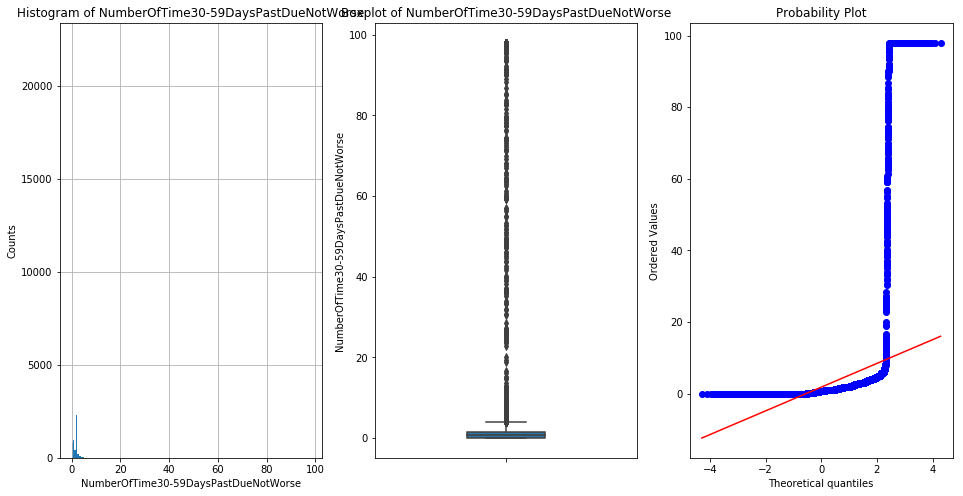

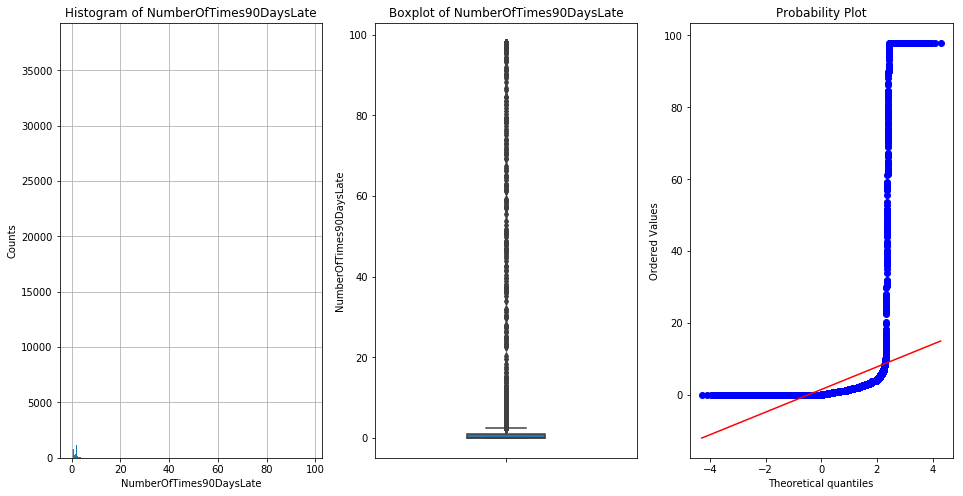

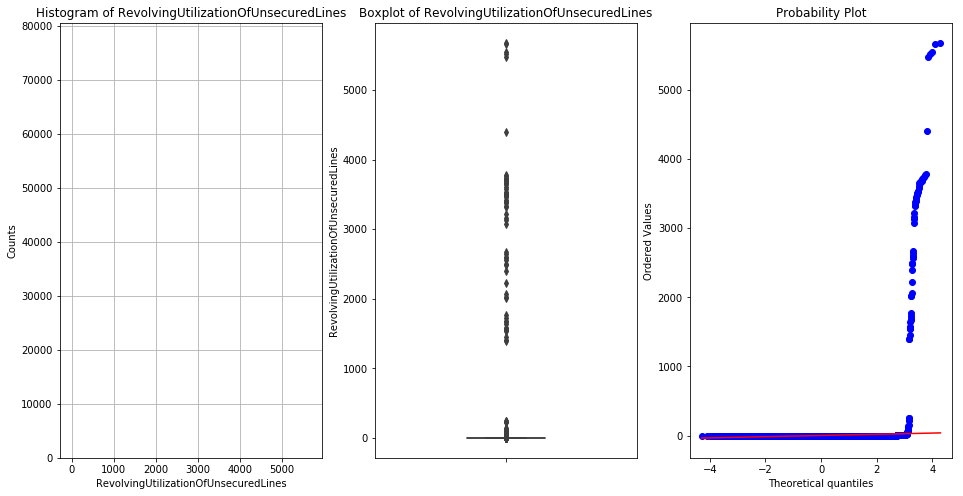

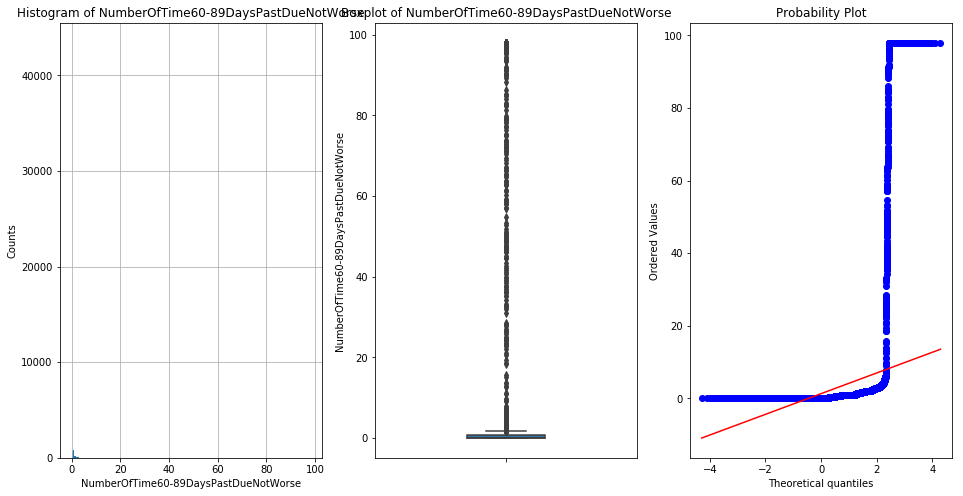

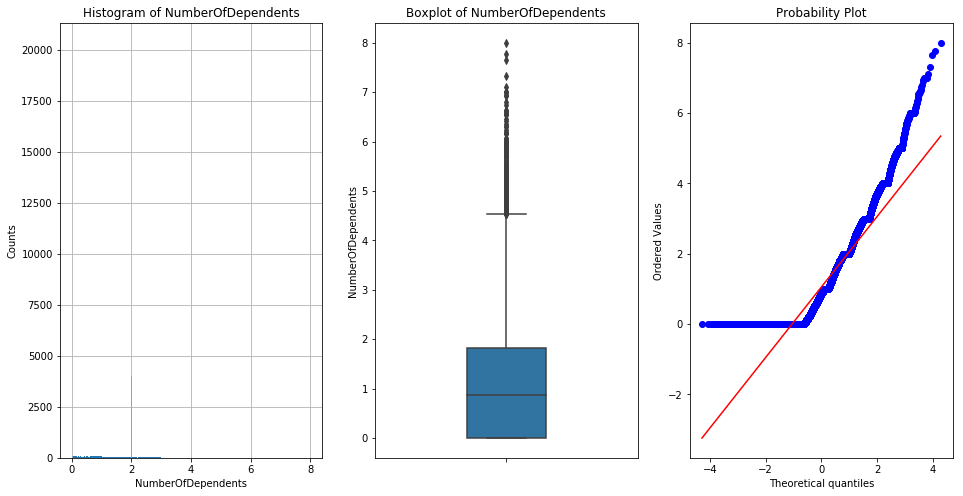

In [31]:
from helper_functions_comprehensive import numerical_distribution_function

# Here I want roughly 30 data points on average to fall in each bin
no_of_bins = len(minority_resampled_train_df)//30

# plot the histogram, boxplots and QQ Plots
numerical_distribution_function(minority_resampled_train_df[imp_column_list], bins=no_of_bins)


The distributions are NOT Gaussian. All the features seem to have a predominance of numbers close to 0. It could be genuine zeros or null values that the business imputed as zeros. We have no way of finding out

In [32]:
for col in imp_column_list:
    print(col, sum(minority_resampled_train_df[col]==0))
# Except RevolvingUtilizationOfUnsecuredLines, the rest of them have an enormous number of 0 values

NumberOfTime30-59DaysPastDueNotWorse 21260
NumberOfTimes90DaysLate 36499
RevolvingUtilizationOfUnsecuredLines 253
NumberOfTime60-89DaysPastDueNotWorse 42424
NumberOfDependents 20211


#### Checking out null values

We know from the previous analysis that there are 2 columns with nulls in the original dataframe. Lets check it out to see if we find anything useful

In [33]:
print(sum(df[pd.isnull(df['MonthlyIncome'])]['SeriousDlqin2yrs'])/
      len(df[pd.isnull(df['MonthlyIncome'])]['SeriousDlqin2yrs']))
# The proportion of SeriousDlqin2yrs in those rows where the MonthlyIncome is null is not  different
# vs the general population

# So the presence of the null in the MonthlyIncome actually gives no indication of 1.
# I would have thought they are too shy to provide that information but no such luck

0.05613669234132723


In [34]:
df[pd.isnull(df['MonthlyIncome'])].head(10)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
6,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0,0
8,0.116951,27,0,46.0,NaN,2,0,0,0,NaN,0
16,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0,0
32,0.083418,62,0,977.0,NaN,6,0,1,0,0.0,0
41,0.072898,81,0,75.0,NaN,7,0,0,0,0.0,0
52,1.000000,62,0,0.0,NaN,1,0,0,0,0.0,0
58,0.541109,43,0,2477.0,NaN,3,0,1,0,2.0,0
62,0.101156,72,0,1720.0,NaN,12,0,2,0,0.0,0
71,0.142013,67,0,1824.0,NaN,7,0,2,0,0.0,0
86,0.360510,58,1,3282.0,NaN,8,0,2,0,0.0,0


In [35]:
# What is the proportion of aged people in this subset as opposed to the general population?

temp_df = df[pd.isnull(df['MonthlyIncome'])].copy()
len(temp_df[temp_df['age']>50])/len(temp_df), len(df[df['age']>50])/len(df)
# Its interesting to see the proportion of elderly 10% higher than the general population

(0.6474723352729475, 0.53244)

In [36]:
# This makees me think that you can fill in the MonthlyIncome nulls with the age-wise median
# which I suspect will be much lower than the overall median MonthlyIncome
# But is there a way to standardize how we deal with null values without recourse to the business?
# Yes. later, we will deal with the imputation in a more formal manner based on above insights

Lets repeat the analysis for the NumberOfDependents and see how it looks like 

In [37]:
print(sum(df[pd.isnull(df['NumberOfDependents'])]['SeriousDlqin2yrs'])/
      len(df[pd.isnull(df['NumberOfDependents'])]['SeriousDlqin2yrs']))
# the absence of values in the NumberOfDependents columns

0.04561671763506626


In [38]:
df[pd.isnull(df['NumberOfDependents'])].head(10)
# Its not visually obvious what could influence the presence of nulls in this columns|

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
8,0.116951,27,0,46.0,NaN,2,0,0,0,NaN,0
96,0.542243,48,2,10.0,NaN,2,0,0,0,NaN,0
109,0.041258,61,0,4739.0,NaN,11,0,4,0,NaN,0
159,0.000000,63,0,2.0,NaN,4,0,0,0,NaN,0
238,1.000000,28,0,0.0,NaN,0,0,0,0,NaN,0
263,0.024671,78,0,392.0,NaN,6,0,1,0,NaN,0
284,0.260971,57,0,5439.0,NaN,16,0,3,0,NaN,0
381,1.000000,22,0,130.0,NaN,0,0,0,0,NaN,0
382,0.571605,66,0,870.0,NaN,12,0,0,0,NaN,0
412,0.000000,59,0,2113.0,NaN,13,0,2,0,NaN,0


#### <a id = 523> Outlier Definition, Detection & Removal

There are various qualitative and quantitative methods of defining outliers depending on the use case


Because of the non-standard distributions seen for the top 5 features, its not exactly obvious what constitutes an outlier, so we will keep all of the points rather than use the Z score or IQR method both of which need a gaussian distribution. In real life you would discuss with the business on what these distributions imply

## <a id='6'> Data Signal Amplification

Now lets start dealing with the real dataframe 

### <a id = 61 > Data Prep - Feature Target & Train Test Split

Before we do any imputation or transformation, we should split it. This ensures that we are fitting with training data and transforming on the test data

In [39]:
X = df.drop(target_class_name, axis=1)
y = df[target_class_name]

# split into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Note optionally convert the pandas dataframe into a numpy array using to_numpy if you have a big data
# and want to model faster. Otherwise it doesnt matter which data structure you use

### <a id='62'>Handling Null Values</a> 

Handling Null Values gets its own section because it is both common and painful enough for all Data Scientists. Ideally the EDA process should give you insights on what the null values are and what needs to be done

Make sure to introduce the binary indicator before any imputation otherwise we will lose information about the missingness. 
This imputation syntax should work for all column types (num, cat, etc) as long as you have turned any weird values into nulls and they are within the null_col_list

#### <a id='621'>Pre-Imputation

In [40]:
from helper_functions_comprehensive import find_bad_columns_function

null_col_list, _, __, ___, ____ = find_bad_columns_function(df)

Identified 2 features with atleast one null
Identified 0 features with atleast one blank space
Identified 0 numeric features that have quasi-constant values
Identified 0 non-numeric features that have quasi-constant values
Identified 0 features that are duplicates of other features


#### - Introduce MissingIndicator column

In [41]:
# Since we dont know a-priori whether the data is Missing Not At Random (MNAR), we will introduce
# a new column to indicate the missingness of each feature that has a null value in it

import feature_engine.missing_data_imputers as mdi
# The alternative is to use the MissingIndicator() from sklearn

# set up the imputer
binary_imputer_obj = mdi.AddNaNBinaryImputer(variables=null_col_list)

# fit the imputer to the train set and transform both the train and test set
binary_imputer_obj.fit(X_train)
X_train = binary_imputer_obj.transform(X_train)
X_test = binary_imputer_obj.transform(X_test)

X_train.head()
# notice how the columns with nulls have an additional column with _na

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncome_na,NumberOfDependents_na
104025,0.000000,29,0,0.011513,4342.0,5,0,0,0,0.0,0,0
5415,0.595526,55,0,0.835333,1833.0,11,0,1,0,0.0,0,0
75612,0.000000,43,0,0.043437,4166.0,2,0,0,0,4.0,0,0
138169,0.391980,40,0,0.059771,9000.0,2,0,0,0,5.0,0,0
87184,0.000000,35,0,0.133598,5800.0,12,0,1,0,0.0,0,0


If you have multiple columns that got imputed, then we need a round of feature reduction using the constant value removal and correlated features. Because its possible that some of the features have missing data that occur at the same time.

#### <a id='622'> Imputation

In [42]:
# There are atleast 6 varieties of imputing: 
# 1) just a blind number like 0 which can skew the distribution
# 2) median which can still skew but better than before
# 3) random distribution which will preserve the distribution but doesnt take advantage of other col
# 4) a given age-specific monthly income (like above 50) based on a hunch 
# 5) age specific median imputation but you are introducing the data scientist's subjectivity
# 6) Multivariate imputation: you are using the other features to predict the missing values

##### - Imputation for numerical columns

- We are NOT allowed to use the Median imputation because more than 5% of the data is missing
- Since it is higher than the 5% threshold, the distribution will be impacted. 

- In those circumstances, use all the features to predict the missing value

In [43]:
# https://scikit-learn.org/stable/modules/impute.html
# Use this to generate multivariate imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=42)

original_col_list = X_train.columns
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

# convert them back into the dataframe
X_train = pd.DataFrame(X_train, columns=original_col_list)
X_test = pd.DataFrame(X_test, columns=original_col_list)

In [44]:
# Run a round of bad column checks to find out if there are duplicates
find_bad_columns_function(X_train)

# As expected there are no nulls anymore and thankfully there are no duplicates of each other either

Identified 0 features with atleast one null
Identified 0 features with atleast one blank space
Identified 0 numeric features that have quasi-constant values
Identified 0 non-numeric features that have quasi-constant values
Identified 0 features that are duplicates of other features


([], [], [], [], set())

#### - Mode imputation for categorical columns

We dont have any categorical columns for which we need null value imputation

#### <a id = 623> Performance Testing on Null Imputed dataframe

In [ ]:
# I usually have entire functions in a separate .py file but this time I have kept it in here

In [45]:
# Make it go through the whole test performance cycle
def modelling_workflow_function(X_train, X_test, y_train, y_test):
    
    '''
    Logic: merges the feature target train and test, converts the object columns into numbers,
    Then splits it back into feature/target train/test, then resamples and tests against real test data
    
    Returns: metric_dict containing all the relevant classification metric 
    including the precision_at_recall_threshold
    
    '''
    from helper_functions_comprehensive import merge_feature_target_train_test_function

    # create a new dataframe to hold the null_imputed values
    dataframe = merge_feature_target_train_test_function(X_train, X_test, y_train, y_test)

    from sklearn.preprocessing import LabelEncoder

    object_columns = dataframe.select_dtypes(include=['object']).columns

    for column in object_columns:
        labelencoder = LabelEncoder()
        dataframe[column] = labelencoder.fit_transform(dataframe[column])

    # Feature Target split
    X = dataframe.drop(target_class_name, axis=1)
    y = dataframe[target_class_name]

    # split into train and test set 
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Resampling, fit and test
    from imblearn.combine import SMOTEENN
    from collections import Counter
    
    metrics_dict=Counter()

    X_resampled_train, y_resampled_train, metrics_dict = resample_and_test_performance_function(
    SMOTEENN(sampling_strategy = 'all' ,random_state=42), X_train, y_train, X_test, y_test, labels)

    return metrics_dict

The size of the resampled train sets are as follows:
(168761, 12) 94274
Has a Test accuracy of 92.0 % 
              precision    recall  f1-score   support

 No Distress       0.96      0.96      0.96     27966
    Distress       0.41      0.41      0.41      2034

    accuracy                           0.92     30000
   macro avg       0.68      0.68      0.68     30000
weighted avg       0.92      0.92      0.92     30000

The ROC AUC Score on Test set is 0.84
Confusion matrix, without normalization
[[26746  1220]
 [ 1201   833]]


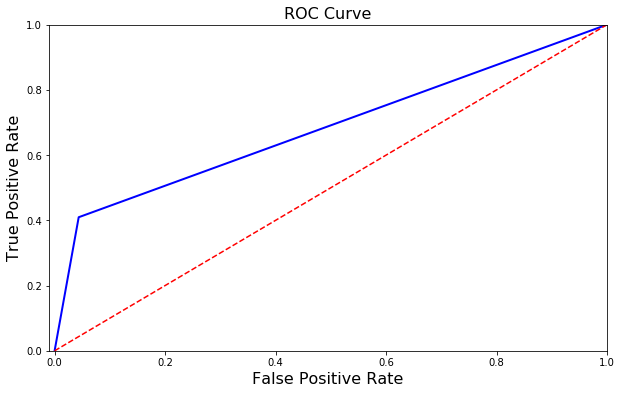

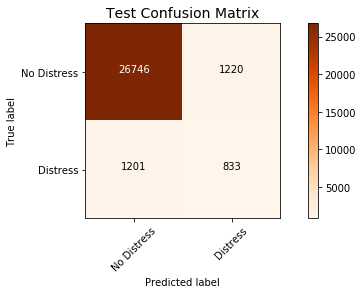

In [46]:
metrics_dict = modelling_workflow_function(X_train, X_test, y_train, y_test)

In [53]:
metrics_dict

Counter({'Pos_Precision': 0.40574768631271313,
         'Pos_Recall': 0.4095378564405113,
         'Pos_F1': 0.40763396134083685,
         'ROC AUC': 0.84,
         'TN': 26746,
         'TP': 833,
         'FN': 1201,
         'FP': 1220,
         'Precision_at_Recall': 0.1506506937860898})

The multivariate imputation works to increase the SNR compared to Day1 ! So lets export this dataset 

In [48]:
from helper_functions_comprehensive import data_export_function

data_export_function(X_train, X_test, y_train, y_test, 
                         intermediate_data_path, output_df_file_name, export_date)

In [49]:
# Lets try a couple of other techniques to amplify the signal

### <a id='63'> Variance Reduction

#### <a id='631'>Binning Numerical Features 

Decision tree based algorithms make cuts on the continuous features. So what if we proactively cut it to help this process downstream?

We are going to skip this section because we didnt find anything useful in the EDA section that would have guided us on what would be the appropriate number of bins

In [50]:
# from feature_engine.discretisers import EqualFrequencyDiscretiser

# contns_to_discrete_col_list = imp_column_list

# # Lets mandate that we need 10 categories as the output from the discretizer based on the EDA step
# no_of_bins = 10
# discretizer_obj = EqualFrequencyDiscretiser(q=no_of_bins, 
#                   variables=contns_to_discrete_col_list, return_object=True)

# # find the intervals for each of the above
# discretizer_obj.fit(X_train)

# # Transform the train and test datasets and then overwrite the existing versions
# X_train = discretizer_obj.transform(X_train)
# X_test = discretizer_obj.transform(X_test)

# X_train.head()
# # note that the discretized column by default gets treated as an object type eventhough its a number

#### <a id='632'> Rare Label Encoding - Categorical Features

Lets skip this section because we dont have any categorical variables

## <a id='7'> Conclusion

The results from the Multivariate Null Imputation on the SMOTEEN resampling allowed you to get a higher results than Day1 and was exported. Lets keep this exported dataset for future analysis

In the next iteration, we are going to try out feature engineering to synthetically increase the number of features available

## <a id='8'>References</a> 

A very good Kaggle notebook for understanding SMOTE 
https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

Understanding IQR and Z scores for Outlier detection and removal
http://colingorrie.github.io/outlier-detection.html